## Clients segmentation with the use of unsupervised learning

The input data is in one CSV file. The file contains 6 columns:

* CustomerID - unique identifier of the customer
* Profit - profitability of client, value without unit, the higher the value the better
* Recency - how many days ago was the customer's last order, quantity in days, the lower the value, the better
* Frequency - how often the customer ordered products, value without unit, the higher the value, the better
* Monetars - total value of products ordered by the customer, unit PLN, the higher the value, the better
* Variance - the number of various products that have been ordered by the customer, value without unit, the higher the value the better

#### Task
As a result, the customers.csv file with the SegmentID column added, which will contain information about the segment given by the unsupervised training algorithm, should be obtained.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading the CSV file
df = pd.read_csv("Customers.csv", sep=";", decimal=",")
df_km = df.copy()
df_km

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
0,1,187,63,1,2349.06,2
1,2,96,10,6,922.62,4
2,3,47,35,4,881.22,3
3,4,294,5,1,3815.16,2
4,5,732,4,31,41868.11,29
...,...,...,...,...,...,...
1506,1507,174,18,3,15798.92,17
1507,1508,124,28,12,2676.89,7
1508,1509,1543,4,17,109497.54,54
1509,1510,668,1,3,49602.45,17


### Eksploratory data analysis

In [3]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerId  1511 non-null   int64  
 1   Profit      1511 non-null   int64  
 2   Recency     1511 non-null   int64  
 3   Frequency   1511 non-null   int64  
 4   Monetary    1511 non-null   float64
 5   Variance    1511 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 71.0 KB


#### We don't have missing values. The data is of two types: int64 and float64, so only numerical data.

In [4]:
df_km.describe()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,756.000000,1102.391132,15.847121,10.710126,1.753805e+05,16.673064
std,436.332442,5457.675137,19.051823,10.348786,1.791089e+06,17.704351
min,1.000000,1.000000,1.000000,1.000000,7.290000e+00,1.000000
25%,378.500000,79.000000,4.000000,3.000000,1.392950e+03,5.000000
50%,756.000000,224.000000,6.000000,9.000000,5.799930e+03,11.000000
75%,1133.500000,559.500000,19.000000,14.500000,2.228900e+04,23.000000
max,1511.000000,105993.000000,91.000000,79.000000,3.253994e+07,139.000000


In [5]:
df_km.CustomerId.nunique()

1511

In [6]:
df_km[df_km.Monetary == max(df_km.Monetary)]

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
399,400,45822,4,15,32539936.23,130


In [7]:
df_km[df_km.Frequency == 1].sort_values(by=["Monetary"])

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
969,970,1,32,1,7.29,1
868,869,1,32,1,7.89,1
603,604,15,70,1,8.22,1
105,106,30,66,1,16.44,1
1294,1295,1,79,1,17.49,1
...,...,...,...,...,...,...
624,625,249,6,1,33891.90,21
547,548,371,5,1,57359.56,47
1343,1344,1138,6,1,63811.68,17
1073,1074,6615,63,1,112525.56,1


In [8]:
df_km[df_km.Frequency >= 60].sort_values(by=["Monetary"])

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
651,652,4583,1,62,146783.76,41
1176,1177,10675,2,60,635018.85,71
409,410,18561,3,65,1118569.77,90
1209,1210,27682,2,60,1816338.45,106
1247,1248,25953,3,64,2194894.59,101
1123,1124,15707,2,75,2572371.81,26
41,42,33273,3,62,3059273.52,96
1479,1480,38877,2,64,4794635.85,102
592,593,42424,2,69,4913887.25,105
144,145,41189,2,65,6319742.34,103


#### Comments and conclusions:
  - We have 1511 clients, no client is repeated. At first glance there are also no incorrect values in the data set (e.g. negative).
  - Looking at the Recency value, we have data from about 3 months here, so it is current data.
  - With a few functions above it appears that the data is generated. It is difficult to define the industry here, so it will be difficult to decide what to pay attention to when dividing into segments.

     Considering the above and looking at the relationships between the features given in the table, I will decide not to take into account the "Profit" and "Variance" columns and I will compare the RFM analysis and the KMeans model on the remaining data. The RFM analysis will be the starting point for the application of the KMeans model. K-Means is one of the most frequently used algorithms for grouping data (as in this case of customer segmentation). In this algorithm, we will have to specify how many groups we want to divide the customers to. We will use the elbow method here.

### Additional data analysis

In [9]:
df_km_subm = df_km.copy() # full df for the file with results

In [10]:
df_km = df_km.drop(columns=['Profit', "Variance"])
df_km

,CustomerId,Recency,Frequency,Monetary
0,1,63,1,2349.06
1,2,10,6,922.62
2,3,35,4,881.22
3,4,5,1,3815.16
4,5,4,31,41868.11
...,...,...,...,...
1506,1507,18,3,15798.92
1507,1508,28,12,2676.89
1508,1509,4,17,109497.54
1509,1510,1,3,49602.45


#### The data is skewed. We can see it better on the graph.

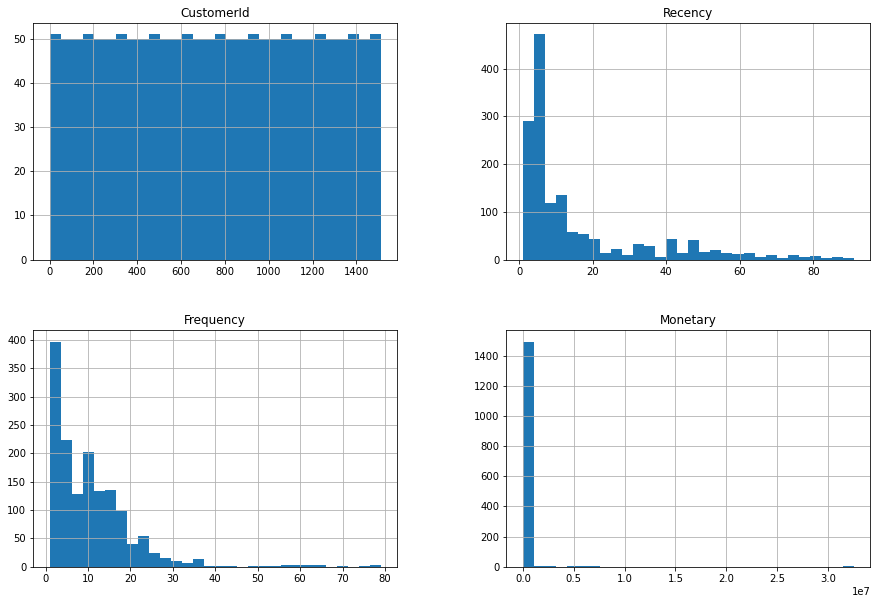

In [11]:
hist = df_km.hist(bins=30, figsize=(15,10))

#### We can prove it by checking the value of skeweness (the higher the value the bigger skew). 

In [12]:
df_km.skew()

CustomerId     0.000000
Recency        1.787808
Frequency      2.642863
Monetary      14.580272
dtype: float64

#### Let's also check outliers

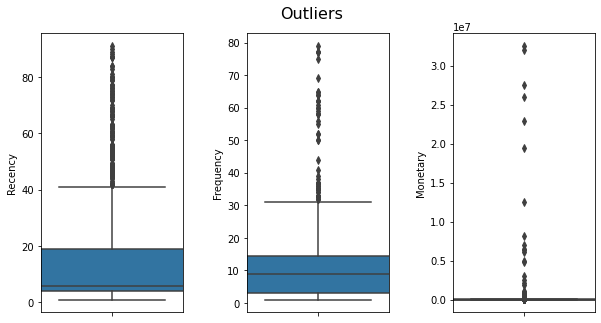

In [13]:
names=['Recency', 'Frequency', 'Monetary']
ncols=len(names)
fig, ax = plt.subplots(1, ncols, figsize=(9,5))
fig.tight_layout(pad=3.0)
fig.suptitle('Outliers', fontsize=16)

for name, ax in zip(names, ax):
    sns.boxplot(y=name, data=df_km, ax=ax, width=1.5)

#### As we can see on the graph we have a lot of outliers. Let's count them to decide what to do with them. 

In [14]:
sorted(df_km)
Q1 = df_km.quantile(0.25)
Q3 = df_km.quantile(0.75)
IQR = Q3 - Q1

In [15]:
((df_km < (Q1 - 1.5 * IQR)) | (df_km > (Q3 + 1.5 * IQR))).sum()

CustomerId      0
Recency       200
Frequency      53
Monetary      195
dtype: int64

#### Those are the values for every column. Let's check how many rows (clients) will be left after deleting outliers. 

In [16]:
df_km_clear = df_km[~((df_km < (Q1 - 1.5*IQR)) | (df_km > (Q3 + 1.5*IQR))).any(axis=1)]
df_km_clear

,CustomerId,Recency,Frequency,Monetary
1,2,10,6,922.62
2,3,35,4,881.22
3,4,5,1,3815.16
4,5,4,31,41868.11
5,6,16,3,2053.40
...,...,...,...,...
1505,1506,11,3,1686.62
1506,1507,18,3,15798.92
1507,1508,28,12,2676.89
1509,1510,1,3,49602.45


#### We have 1110 customers left out of 1511, which gives us about 73%, so over 1/4 of the data were deleted. First I will try to use the complete data and depending on the results I will take the next steps. 

## Data analysis using K-Means

In [17]:
# Data normalization for KMeans using logarith and StandardScaler function
df_log = np.log1p(df_km)
scaler = StandardScaler()
scaler.fit(df_log)
norm = scaler.transform(df_log)

In [18]:
# To get the optimal number of segments let's make the graph. 
def elbow_plot(df):
    """Makes the graph to get the optimal number of segments"""
    SSE = {}
    
    for k in range(1,15):
        kmeans = KMeans(n_clusters = k, random_state = 555)
        kmeans.fit(norm)
        SSE[k] = kmeans.inertia_
        
    plt.title("Optimal number of segments - elbow method")
    plt.xlabel('k')
    sns.pointplot(x=list(SSE.keys()),
                  y=list(SSE.values()))
    
    plt.show()

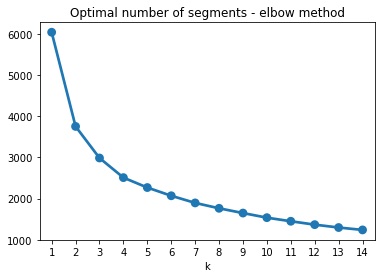

In [19]:
elbow_plot(df_km)

In the chart, we can see that the optimal number of segments is between 4 and 6. We should move in this area. I started the analysis with 5 segments but it was not satisfactory. The K-Means algorithm achieved better results with 6 segments.

In [20]:
# Using KMeand algorithm on normalized data
kmeans = KMeans(init='k-means++',
                    random_state=555,
                    n_clusters=6)
kmeans.fit(norm)
df_km['SegmentId'] = kmeans.labels_
df_km

,CustomerId,Recency,Frequency,Monetary,SegmentId
0,1,63,1,2349.06,5
1,2,10,6,922.62,5
2,3,35,4,881.22,5
3,4,5,1,3815.16,5
4,5,4,31,41868.11,2
...,...,...,...,...,...
1506,1507,18,3,15798.92,3
1507,1508,28,12,2676.89,3
1508,1509,4,17,109497.54,4
1509,1510,1,3,49602.45,1


In [21]:
# Grouping clients to segments
df_km.groupby('SegmentId').agg(
    Recency=('Recency','mean'),
    Frequency=('Frequency','mean'),
    Monetary=('Monetary','mean'),
    cluster_size=('CustomerId','count')
).round(1)

,Recency,Frequency,Monetary,cluster_size
SegmentId,,,,
0,46.3,1.6,719.6,223
1,5.7,6.8,4744.7,347
2,5.3,16.4,451163.4,165
3,29.0,6.0,41205.7,230
4,4.9,19.1,378340.1,473
5,24.6,4.7,4369.0,73


In [22]:
# Data visualization with the 3D plot
def clusters_plot(df):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111, projection = '3d')

    for x in df.SegmentId.unique():
        xs = df[df.SegmentId == x]['Frequency']
        zs = df[df.SegmentId == x]['Recency']
        ys = df[df.SegmentId == x]['Monetary']
        ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w', label = x)

    ax.set_xlabel('Frequency')
    ax.set_zlabel('Recency')
    ax.set_ylabel('Monetary')
    plt.title('Clients segmentation')
    plt.legend()
    plt.show()

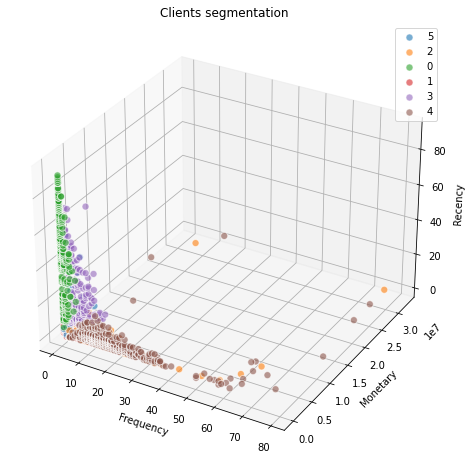

In [23]:
clusters_plot(df_km)

### Assigning names to segments

Division into customers groups:
1. Loyal customers (SegmentId - 4) - they buy often, have recently bought, buy for large amounts (there are a lot of them)
2. Spending a lot (SegmentId - 2) - buying equally often, for high amounts (fewer customers but the amount exceeds group 1)
3. In need of attention - (SegmentId 3) - they buy much less often, they have bought quite a long time ago, but they buy too high amounts
4. New customers - (SegmentId 1) - they rarely buy, but they have bought quite recently for quite good amounts
5. Promising customers - (SegmentId 5) - they rarely buy, they bought for quite a long time, for quite good amounts
6. Lost customers (random or those who made purchases once) - (SegmentId 0) - bought a long time ago, very rarely, for much lower amounts

In [24]:
df_km["SegmentName"] = df_km["SegmentId"].map({0: "Lost customers", 1: "New customers", 2: "Spending a lot", 3:"In need of attention", 4:"Loyal customers", 5:"Promising customers"})
df_km

,CustomerId,Recency,Frequency,Monetary,SegmentId,SegmentName
0,1,63,1,2349.06,5,Promising customers
1,2,10,6,922.62,5,Promising customers
2,3,35,4,881.22,5,Promising customers
3,4,5,1,3815.16,5,Promising customers
4,5,4,31,41868.11,2,Spending a lot
...,...,...,...,...,...,...
1506,1507,18,3,15798.92,3,In need of attention
1507,1508,28,12,2676.89,3,In need of attention
1508,1509,4,17,109497.54,4,Loyal customers
1509,1510,1,3,49602.45,1,New customers


In [25]:
df_km_subm["SegmentId"] = df_km["SegmentId"]
df_km_subm["SegmentName"] = df_km["SegmentName"]
df_km_subm

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId,SegmentName
0,1,187,63,1,2349.06,2,5,Promising customers
1,2,96,10,6,922.62,4,5,Promising customers
2,3,47,35,4,881.22,3,5,Promising customers
3,4,294,5,1,3815.16,2,5,Promising customers
4,5,732,4,31,41868.11,29,2,Spending a lot
...,...,...,...,...,...,...,...,...
1506,1507,174,18,3,15798.92,17,3,In need of attention
1507,1508,124,28,12,2676.89,7,3,In need of attention
1508,1509,1543,4,17,109497.54,54,4,Loyal customers
1509,1510,668,1,3,49602.45,17,1,New customers


In [26]:
#df_km_subm.to_csv("customers.csv")

### RFM analysis (additional)

In [26]:
df_rfm = df

In [27]:
# I won't also use Profit and Variance columns
df_rfm = df_rfm.drop(columns=['Profit', "Variance"])

In [28]:
df_rfm

,CustomerId,Recency,Frequency,Monetary
0,1,63,1,2349.06
1,2,10,6,922.62
2,3,35,4,881.22
3,4,5,1,3815.16
4,5,4,31,41868.11
...,...,...,...,...
1506,1507,18,3,15798.92
1507,1508,28,12,2676.89
1508,1509,4,17,109497.54
1509,1510,1,3,49602.45


In [29]:
# We have to make division into quartiles 

R = pd.qcut(df_rfm["Recency"], 5, labels = range(5, 0, -1))
F = pd.qcut(df_rfm["Frequency"], 5, labels = range(1, 6))
M = pd.qcut(df_rfm["Monetary"], 5, labels = range(1, 6))

In [30]:
df_rfm["R"] = R.values
df_rfm["F"] = F.values
df_rfm["M"] = M.values
df_rfm

,CustomerId,Recency,Frequency,Monetary,R,F,M
0,1,63,1,2349.06,1,1,2
1,2,10,6,922.62,3,2,1
2,3,35,4,881.22,1,2,1
3,4,5,1,3815.16,4,1,3
4,5,4,31,41868.11,5,5,5
...,...,...,...,...,...,...,...
1506,1507,18,3,15798.92,2,1,4
1507,1508,28,12,2676.89,2,4,2
1508,1509,4,17,109497.54,5,5,5
1509,1510,1,3,49602.45,5,1,5


#### Two divisions were made here:
1. With the use of RFM_segment - division by combining the results for R, F and M giving 125 possibilities (the result values are grouped before the division)
2. With RFM_score - split by summing the results for R, F, and M into 13 groups

In [31]:
df_rfm['RFM_segment'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)
df_rfm['RFM_score'] = df_rfm[['R', 'F', 'M']].sum(axis=1)
df_rfm

,CustomerId,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
0,1,63,1,2349.06,1,1,2,112,4
1,2,10,6,922.62,3,2,1,321,6
2,3,35,4,881.22,1,2,1,121,4
3,4,5,1,3815.16,4,1,3,413,8
4,5,4,31,41868.11,5,5,5,555,15
...,...,...,...,...,...,...,...,...,...
1506,1507,18,3,15798.92,2,1,4,214,7
1507,1508,28,12,2676.89,2,4,2,242,8
1508,1509,4,17,109497.54,5,5,5,555,15
1509,1510,1,3,49602.45,5,1,5,515,11


In [32]:
rfm_agg = df_rfm.groupby('RFM_score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})
rfm_agg.round(1)

Recency Frequency   Monetary      
             mean      mean       mean count
RFM_score                                   
3            54.5       1.3      274.8   127
4            37.0       2.3     1097.3   110
5            29.3       3.2     2300.5   106
6            22.3       5.0     3626.0    80
7            15.9       5.1    61841.4   117
8            13.5       8.0     9578.4   113
9             9.0       8.1   157069.3   134
10            6.8      10.0    12702.6   132
11            5.6      11.4   315582.1   122
12            4.8      14.4    29966.8   137
13            4.3      16.6    47616.0   139
14            3.6      21.2   356177.7   108
15            2.9      36.9  1692747.6    86

Dididing into 5 segments (like with KMeans)

In [33]:
score_labels = ['5', '4', '3', '2', '1', '0']
score_segments = pd.qcut(df_rfm.RFM_score, q = 6, labels = score_labels)
df_rfm['SegmentId'] = score_segments.values
df_rfm


,CustomerId,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,SegmentId
0,1,63,1,2349.06,1,1,2,112,4,5
1,2,10,6,922.62,3,2,1,321,6,4
2,3,35,4,881.22,1,2,1,121,4,5
3,4,5,1,3815.16,4,1,3,413,8,3
4,5,4,31,41868.11,5,5,5,555,15,0
...,...,...,...,...,...,...,...,...,...,...
1506,1507,18,3,15798.92,2,1,4,214,7,4
1507,1508,28,12,2676.89,2,4,2,242,8,3
1508,1509,4,17,109497.54,5,5,5,555,15,0
1509,1510,1,3,49602.45,5,1,5,515,11,2


In [34]:
df_rfm.groupby('SegmentId').agg({'CustomerId': 'count',
                                 'Recency' : 'mean',
                                 'Frequency' : 'mean',
                                 'Monetary' : ['mean']}).round(1)

,CustomerId,Recency,Frequency,Monetary
,count,mean,mean,mean
SegmentId,,,,
5,343,41.1,2.2,1164.6
4,197,18.5,5.0,38200.6
3,247,11.0,8.1,89593.7
2,254,6.2,10.7,158180.1
1,276,4.6,15.5,38855.4
0,194,3.3,28.1,948677.8


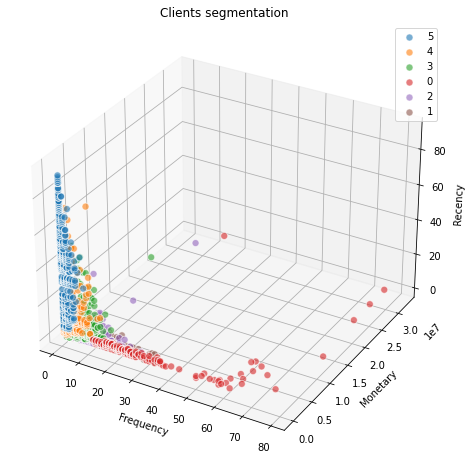

In [35]:
clusters_plot(df_rfm)

Here, the distribution of the number of customers is much more regular and therefore the average amounts are lower. The values for R, F, and M also differ.